In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers

In [2]:
from untitled import get_dataset, quanv, MyModel, prepare_images

In [3]:
X_train, Y_train, X_test, Y_test = get_dataset(30, 10)

(<Figure size 1200x1700 with 1 Axes>, <Axes: >)

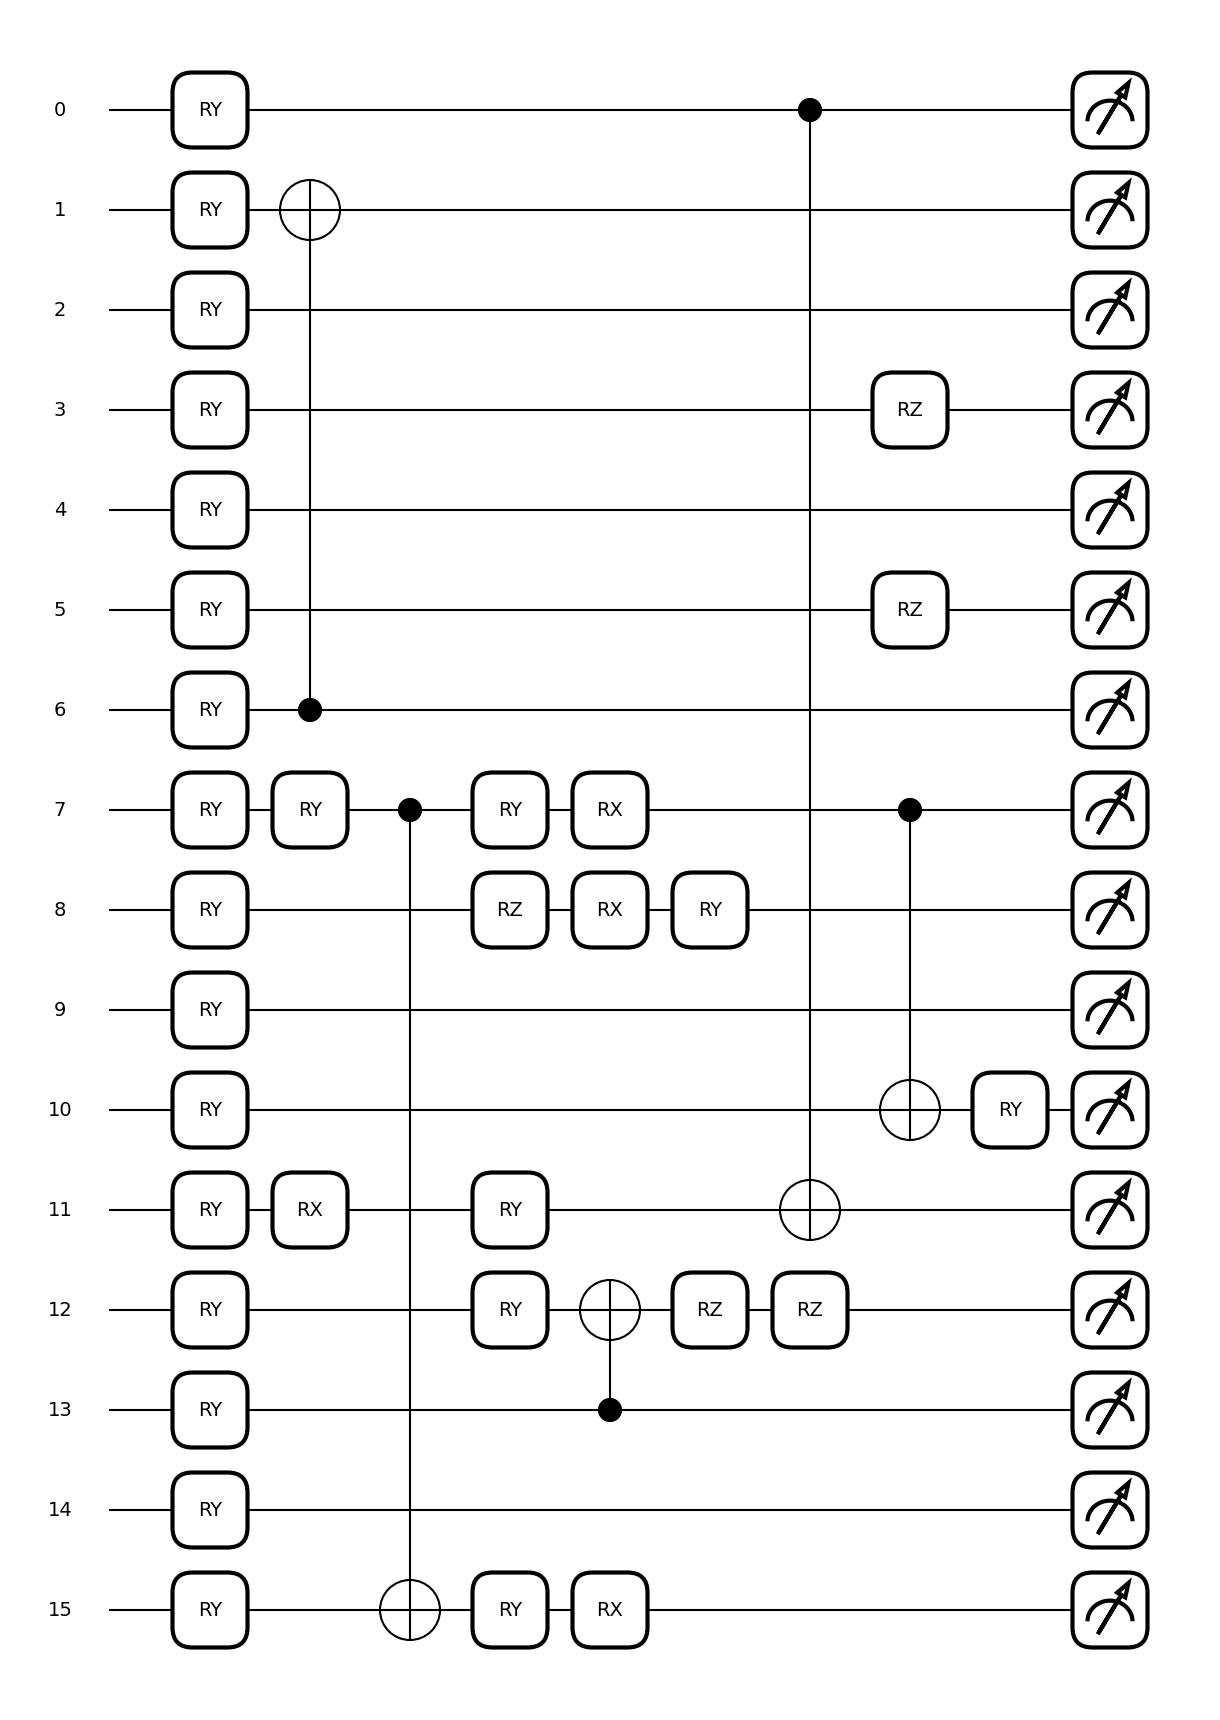

In [4]:
wires = 16
n_layers = 1

dev = qml.device("default.qubit", wires=wires)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, wires))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(wires):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(wires)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(wires)]

qml.draw_mpl(circuit, expansion_strategy="device")(rand_params.reshape((wires, 1)))

In [5]:
X_train[0].shape

(28, 28, 1)

In [6]:
quanv(X_train[0], circuit, 4).shape

(7, 7, 16)

In [7]:
q_train_images, q_test_images = prepare_images(X_train, X_test, circuit, stride = 4)

Quantum pre-processing of train images:
1/30
2/30
3/30
4/30
5/30
6/30
7/30
8/30
9/30
10/30
11/30
12/30
13/30
14/30
15/30
16/30
17/30
18/30
19/30
20/30
21/30
22/30
23/30
24/30
25/30
26/30
27/30
28/30
29/30
30/30
Quantum pre-processing of test images:
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


In [8]:
model = MyModel(10)

history = model.fit(
    q_train_images,
    Y_train,
    validation_data=(q_test_images, Y_test),
    batch_size=4,
    epochs=100,
    verbose=2,
)

Epoch 1/100
8/8 - 1s - 126ms/step - accuracy: 0.1000 - loss: 2.8561 - val_accuracy: 0.3000 - val_loss: 2.0088
Epoch 2/100
8/8 - 0s - 9ms/step - accuracy: 0.3333 - loss: 1.8943 - val_accuracy: 0.2000 - val_loss: 1.9415
Epoch 3/100
8/8 - 0s - 7ms/step - accuracy: 0.4667 - loss: 1.6523 - val_accuracy: 0.3000 - val_loss: 1.8594
Epoch 4/100
8/8 - 0s - 9ms/step - accuracy: 0.6333 - loss: 1.3839 - val_accuracy: 0.4000 - val_loss: 1.6503
Epoch 5/100
8/8 - 0s - 8ms/step - accuracy: 0.7000 - loss: 1.1345 - val_accuracy: 0.3000 - val_loss: 1.5726
Epoch 6/100
8/8 - 0s - 8ms/step - accuracy: 0.8333 - loss: 0.9617 - val_accuracy: 0.4000 - val_loss: 1.4712
Epoch 7/100
8/8 - 0s - 7ms/step - accuracy: 0.9333 - loss: 0.8133 - val_accuracy: 0.4000 - val_loss: 1.4387
Epoch 8/100
8/8 - 0s - 17ms/step - accuracy: 0.9333 - loss: 0.6901 - val_accuracy: 0.4000 - val_loss: 1.4960
Epoch 9/100
8/8 - 0s - 9ms/step - accuracy: 0.9667 - loss: 0.5899 - val_accuracy: 0.3000 - val_loss: 1.4229
Epoch 10/100
8/8 - 0s - 8

(<Figure size 800x500 with 1 Axes>, <Axes: >)

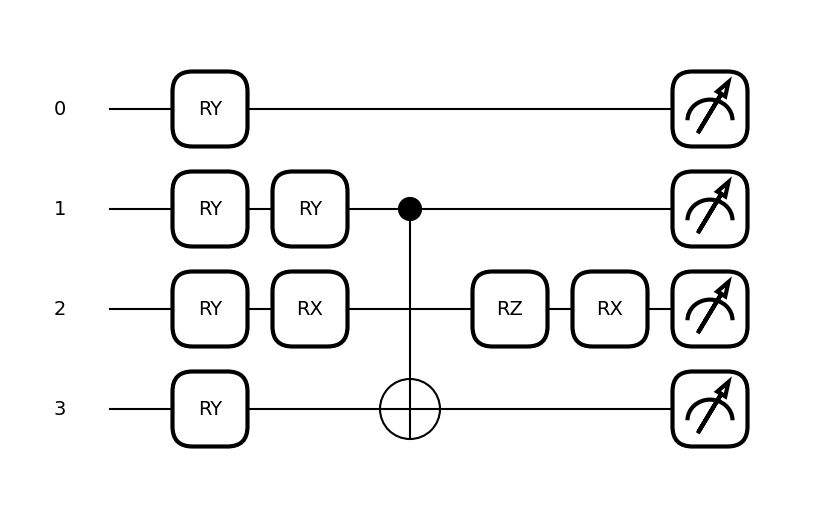

In [9]:
wires = 4
n_layers = 1

dev = qml.device("default.qubit", wires=wires)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, wires))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(wires):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(wires)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(wires)]

qml.draw_mpl(circuit, expansion_strategy="device")(rand_params.reshape((wires, 1)))

In [10]:
X_train[0].shape

(28, 28, 1)

In [11]:
quanv(X_train[0], circuit, 2).shape

(14, 14, 4)

In [12]:
q_train_images, q_test_images = prepare_images(X_train, X_test, circuit, stride = 2)

Quantum pre-processing of train images:
1/30
2/30
3/30
4/30
5/30
6/30
7/30
8/30
9/30
10/30
11/30
12/30
13/30
14/30
15/30
16/30
17/30
18/30
19/30
20/30
21/30
22/30
23/30
24/30
25/30
26/30
27/30
28/30
29/30
30/30
Quantum pre-processing of test images:
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


In [13]:
model2 = MyModel(10)

history2 = model2.fit(
    q_train_images,
    Y_train,
    validation_data=(q_test_images, Y_test),
    batch_size=4,
    epochs=100,
    verbose=2,
)

Epoch 1/100
8/8 - 1s - 114ms/step - accuracy: 0.1333 - loss: 2.6546 - val_accuracy: 0.2000 - val_loss: 2.1591
Epoch 2/100
8/8 - 0s - 13ms/step - accuracy: 0.3333 - loss: 1.9323 - val_accuracy: 0.2000 - val_loss: 2.1935
Epoch 3/100
8/8 - 0s - 18ms/step - accuracy: 0.5333 - loss: 1.6365 - val_accuracy: 0.2000 - val_loss: 2.0597
Epoch 4/100
8/8 - 0s - 17ms/step - accuracy: 0.6667 - loss: 1.3664 - val_accuracy: 0.2000 - val_loss: 1.8757
Epoch 5/100
8/8 - 0s - 13ms/step - accuracy: 0.7000 - loss: 1.1653 - val_accuracy: 0.2000 - val_loss: 1.8087
Epoch 6/100
8/8 - 0s - 16ms/step - accuracy: 0.8333 - loss: 0.9936 - val_accuracy: 0.3000 - val_loss: 1.6947
Epoch 7/100
8/8 - 0s - 19ms/step - accuracy: 0.8333 - loss: 0.8568 - val_accuracy: 0.4000 - val_loss: 1.6033
Epoch 8/100
8/8 - 0s - 13ms/step - accuracy: 0.9000 - loss: 0.7415 - val_accuracy: 0.4000 - val_loss: 1.5695
Epoch 9/100
8/8 - 0s - 12ms/step - accuracy: 0.9000 - loss: 0.6351 - val_accuracy: 0.3000 - val_loss: 1.5412
Epoch 10/100
8/8 -

Text(0.5, 1.0, 'Validation accuracy for 2 cases 4x4 vs 2x2 quanvolution kernel')

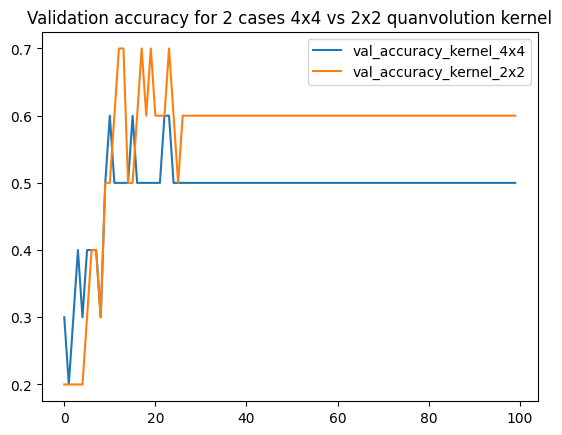

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.legend(['val_accuracy_kernel_4x4', 'val_accuracy_kernel_2x2'])
plt.title("Validation accuracy for 2 cases 4x4 vs 2x2 quanvolution kernel")